# Identifying Shopping Trends using Data Analysis

# Importing  the required libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('shopping_trends_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [19]:
df.keys()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

<Axes: >

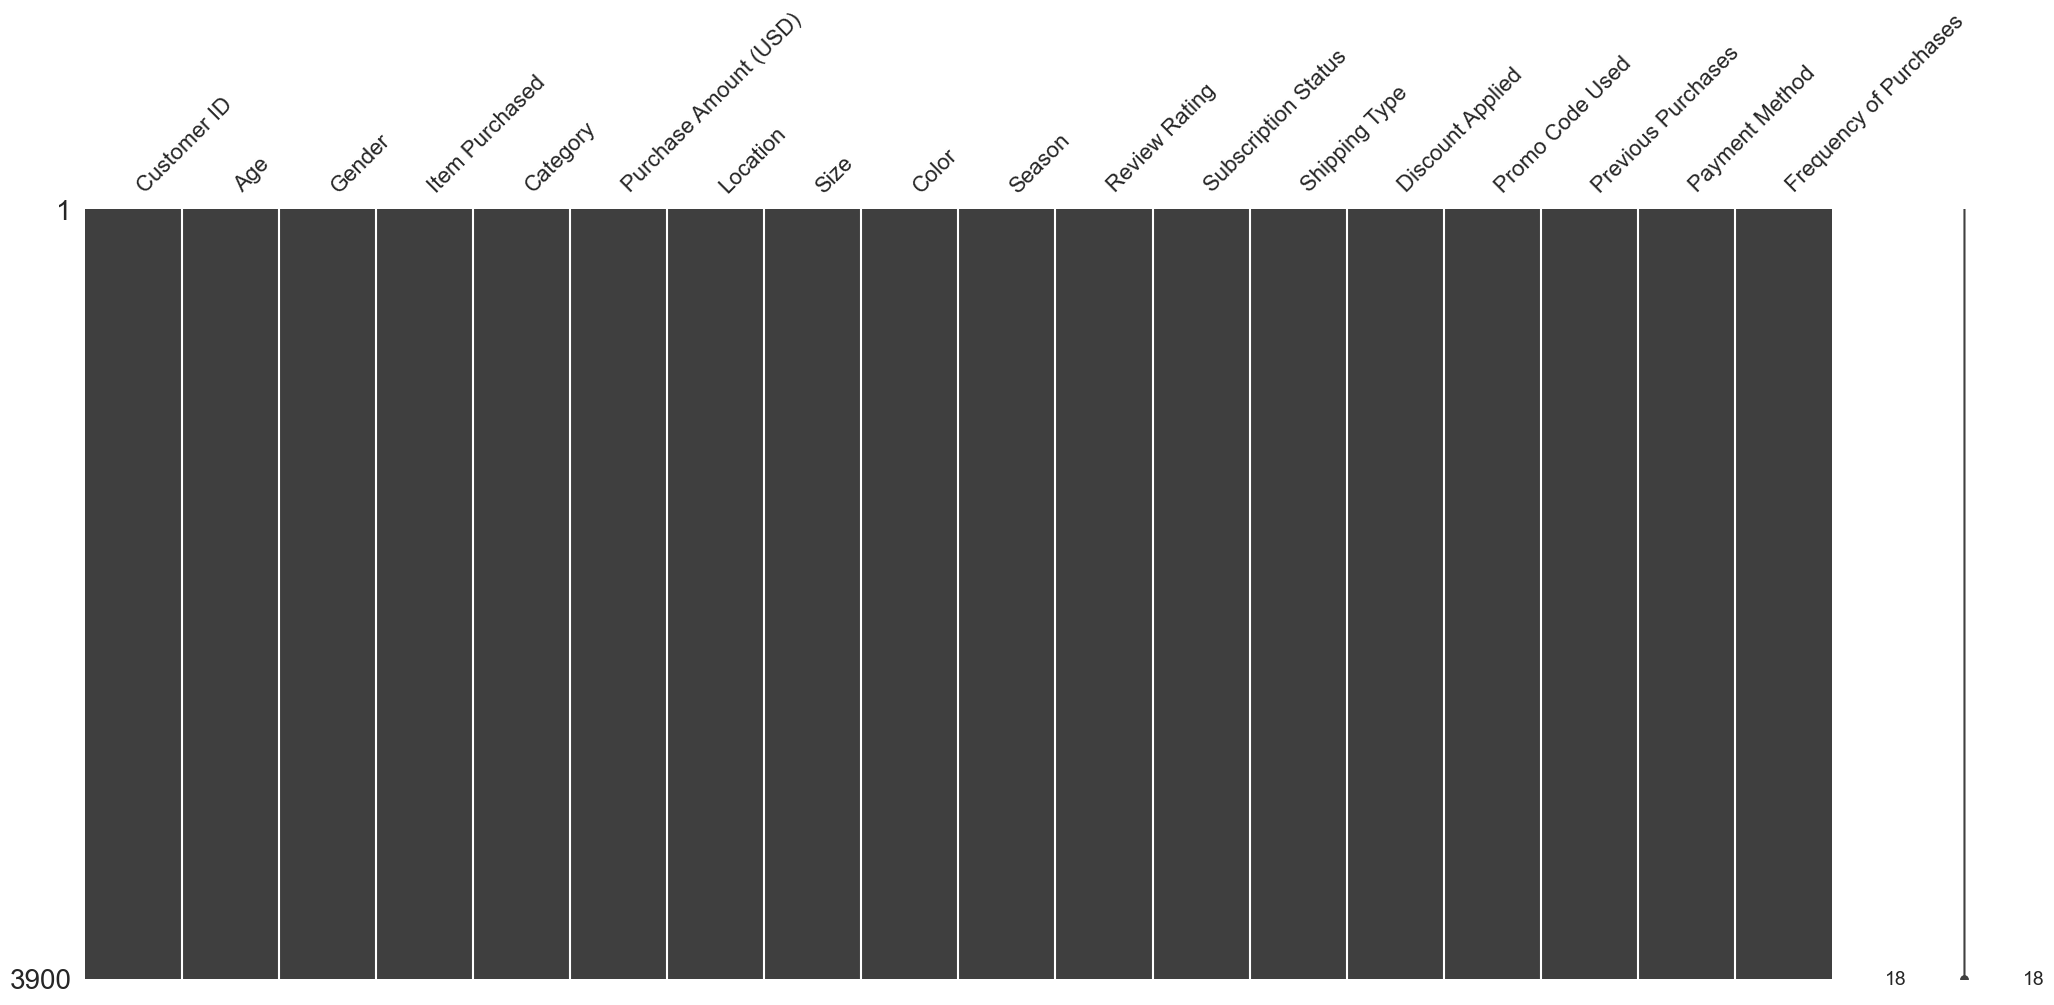

In [20]:
import missingno as msn
msn.matrix(df)

In [21]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Gender
Male      2652
Female    1248
Name: count, dtype: int64


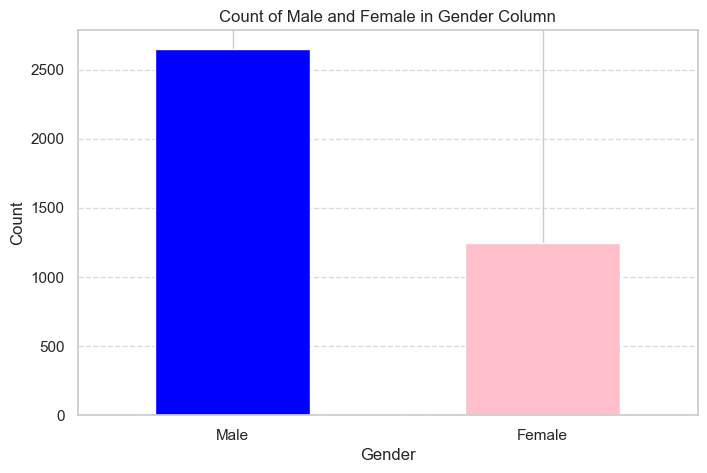

In [22]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Count of Male and Female in Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

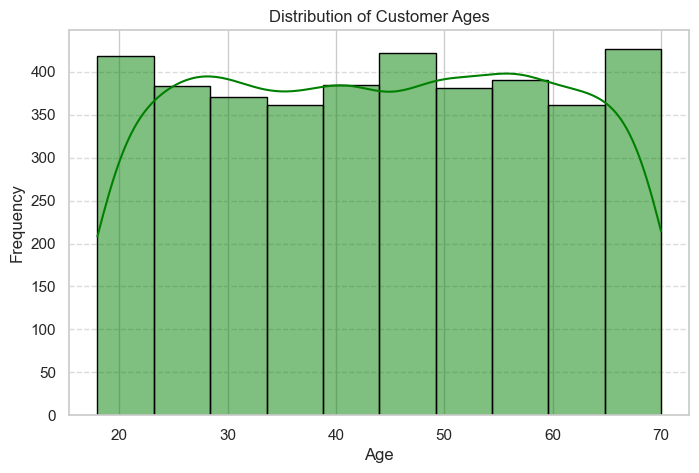

In [23]:
#What is the overall distribution of customer ages in the dataset?
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




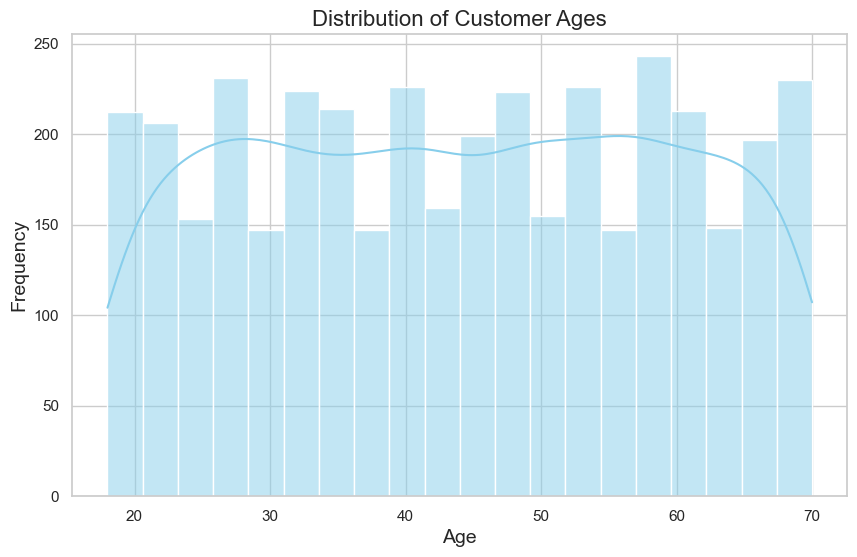

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Overall distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



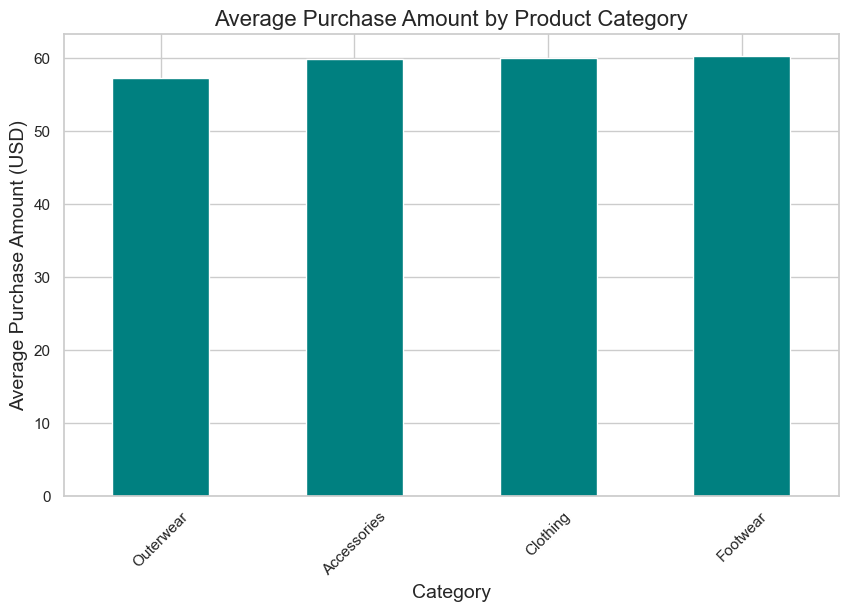

In [25]:
# 2. Average purchase amount by product category
avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_purchase_by_category.plot(kind='bar', color='teal')
plt.title('Average Purchase Amount by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


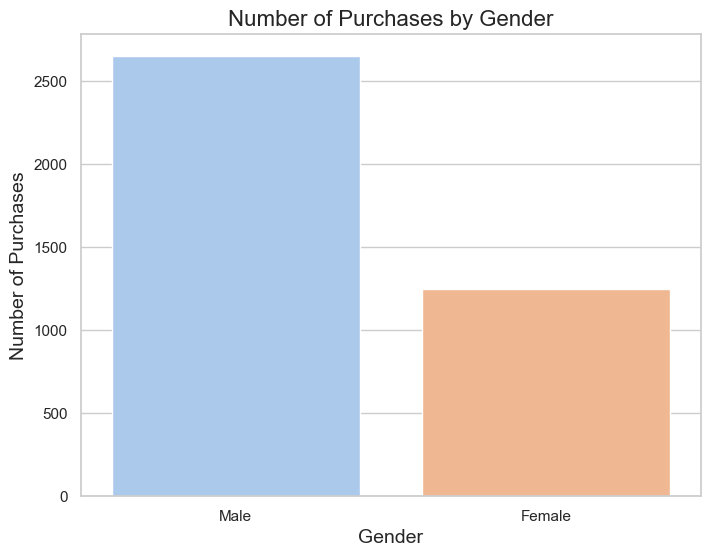

In [30]:
import warnings
warnings.simplefilter("ignore")
# 3. Gender with the highest number of purchases
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Number of Purchases by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.show()


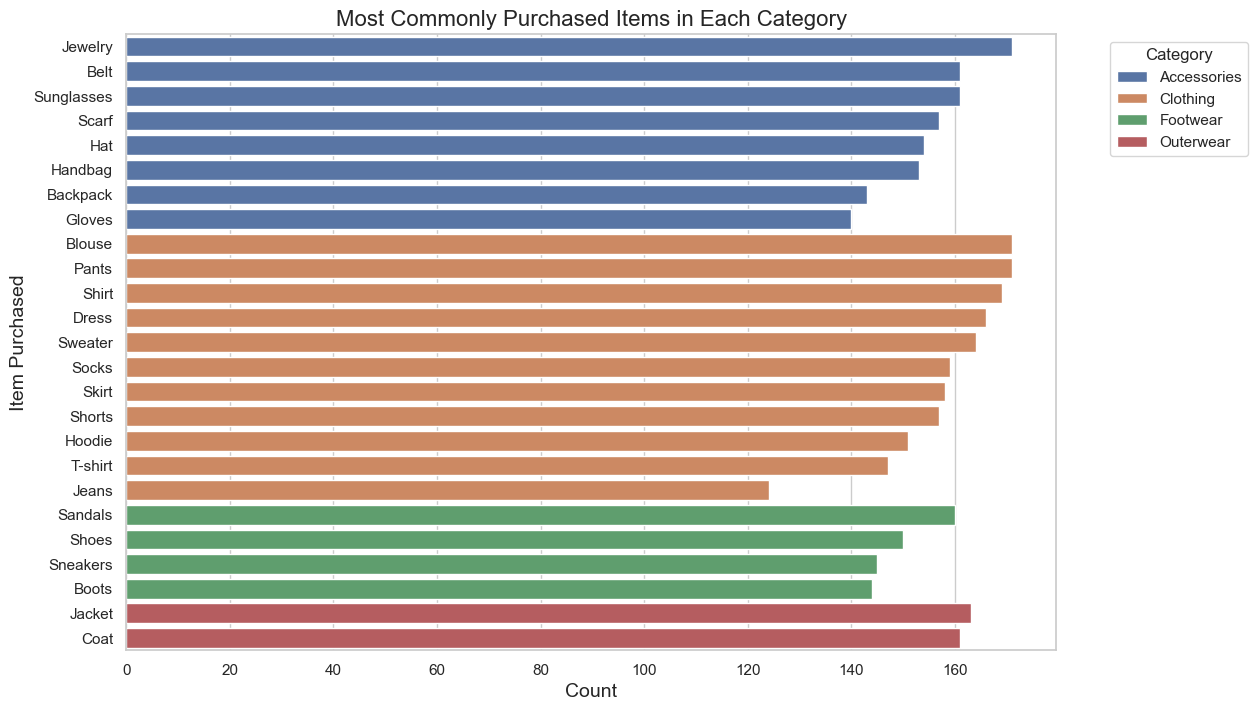

In [27]:
# 4. Most commonly purchased items in each category
most_common_items = df.groupby(['Category', 'Item Purchased']).size().reset_index(name='Count')
most_common_items = most_common_items.sort_values(['Category', 'Count'], ascending=[True, False])
plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_items, x='Count', y='Item Purchased', hue='Category', dodge=False)
plt.title('Most Commonly Purchased Items in Each Category', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Item Purchased', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


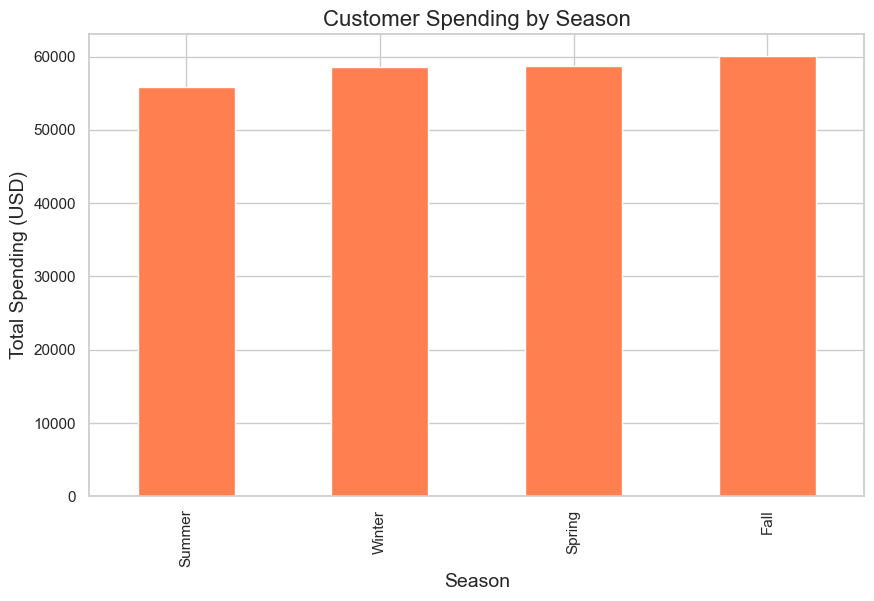

In [28]:
# 5. Seasons or months with higher spending
season_spending = data.groupby('Season')['Purchase Amount (USD)'].sum().sort_values()
plt.figure(figsize=(10, 6))
season_spending.plot(kind='bar', color='coral')
plt.title('Customer Spending by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Spending (USD)', fontsize=14)
plt.show()


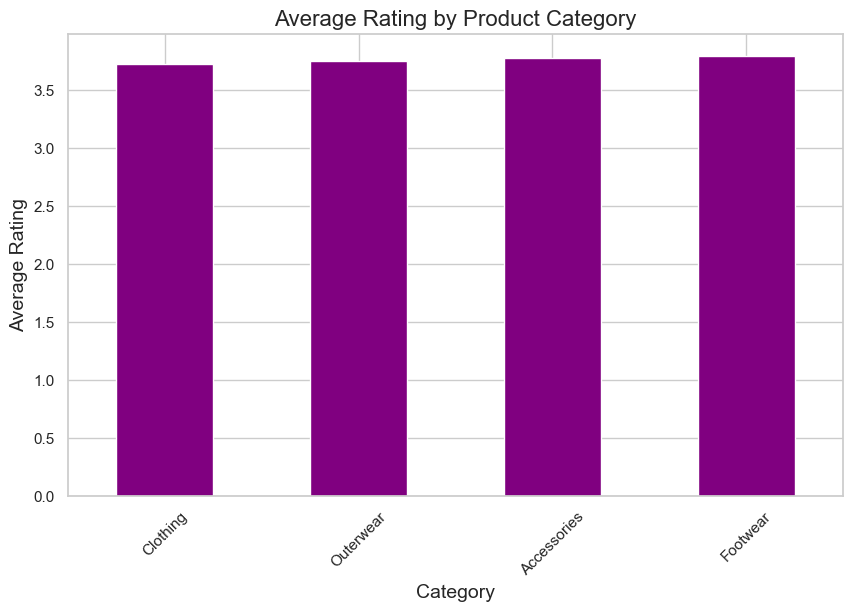

In [29]:
avg_rating_by_category = df.groupby('Category')['Review Rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_rating_by_category.plot(kind='bar', color='purple')
plt.title('Average Rating by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()